In [1]:
# 나눔고딕 폰트 설치 및 설정
# !apt-get update -qq
# !apt-get install fonts-nanum -qq
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

MSE (평균제곱오차): 0.228
R² (결정계수)     : 0.848
mse = 0.228, rmse = 0.477
mae = 0.398


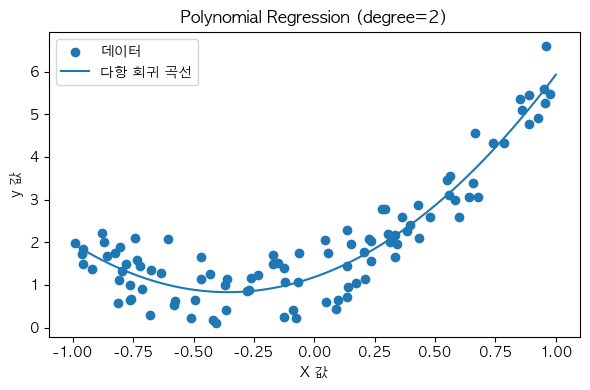

In [ ]:

# 1) 라이브러리 로드
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.font_manager as fm
from sklearn.metrics import mean_absolute_error

# 폰트 설정
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=10)
# plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['axes.unicode_minus'] = False
font_path='/System/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False

# 2) 합성 비선형 데이터 생성
#    y = 3x^2 + 2x + 1 + 잡음
rng = np.random.RandomState(0)
X = 2 * rng.rand(100, 1) - 1  # -1 ~ 1 구간의 입력 변수
y = 3 * X**2 + 2 * X + 1 + rng.randn(100, 1) * 0.5  # 잡음 추가

# 3) 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) 다항 특성 변환 (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# 5) 선형 회귀 모델 학습
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 6) 예측 및 평가
y_pred = lr.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE (평균제곱오차): {mse:.3f}")
print(f"R² (결정계수)     : {r2:.3f}")
print('mse = {:.3f}, rmse = {:.3f}'.format(mse, rmse))
print('MAE (Mean Absolute Error) = {:.3f}'.format(mae))

# 7) 결과 시각화
#    원본 데이터와 다항 회귀 곡선을 함께 그리기
X_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = lr.predict(X_plot_poly)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, label='데이터')
plt.plot(X_plot, y_plot, label='다항 회귀 곡선')
plt.title('Polynomial Regression (degree=2)')
plt.xlabel('X 값')
plt.ylabel('y 값')
plt.legend()
plt.tight_layout()
plt.show()
